In [1]:
from ntm_train import *

In [2]:
init_seed(10)
NUM_BITS = 8
LSTM_DIM = 256
MIN_LENGTH = 1
MAX_LENGTH = 20
LEARNING_RATE = 1e-4
MOMENTUM = 0.9 
MINI_BATCH = 20
EPOCH = 50000

#model = EncapsulatedNTM(num_inputs=NUM_BITS+1, num_outputs=NUM_BITS,
#                        controller_size=100, controller_layers=1, num_heads=1, N=128, M=20, controller_type ='mlp')

model = EncapsulatedNTM(num_inputs=NUM_BITS+1, num_outputs=NUM_BITS,
                        controller_size=100, controller_layers=1, num_heads=1, N=128, M=20, controller_type ='lstm')

loss_function = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)

train_data_loader = dataloader(EPOCH,MINI_BATCH,NUM_BITS,MIN_LENGTH,MAX_LENGTH)

In [3]:
model, list_seq_num, list_loss, list_cost = loadCheckpoint(path='ntm_lstm_l1_b20_e50000_i1')
list_ntm_lstm_50 = np.mean(np.array(list_cost).reshape(50,1000), axis=1)

==> Resuming from checkpoint..


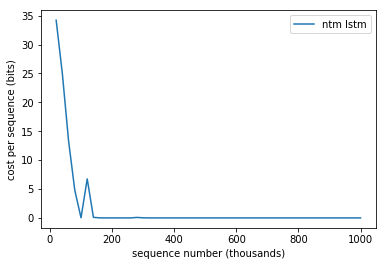

In [4]:
plt.plot(range(20,1020,20),list_ntm_lstm_50,label='ntm lstm')
plt.xlabel('sequence number (thousands)')
plt.ylabel('cost per sequence (bits)')
plt.legend()

In [5]:
list_avg_loss = []
list_avg_cost = []
for T in range(10,110,10) : 
    test_data_loader = dataloader(num_batches = 1,batch_size = MINI_BATCH,seq_width=8,min_len=T,max_len=T)
    avg_loss, avg_cost = evaluate(model,test_data_loader,loss_function)
    list_avg_loss.append(avg_loss)
    list_avg_cost.append(avg_cost)

T = 10, Average loss 0.000000, average cost 0.000000
T = 20, Average loss 0.000000, average cost 0.000000
T = 30, Average loss 0.000000, average cost 0.000000
T = 40, Average loss 0.000000, average cost 0.000000
T = 50, Average loss 0.000000, average cost 0.000000
T = 60, Average loss 0.000001, average cost 0.000000
T = 70, Average loss 0.000005, average cost 0.000000
T = 80, Average loss 0.029291, average cost 16.200000
T = 90, Average loss 0.027816, average cost 17.500000
T = 100, Average loss 0.069275, average cost 78.350000


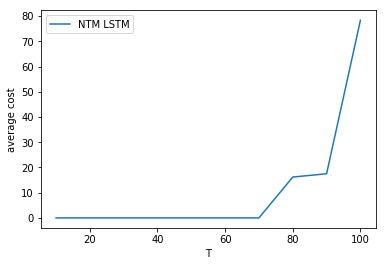

In [8]:
plt.plot(range(10,110,10),list_avg_cost,label='NTM LSTM')
plt.xlabel('T')
plt.ylabel('average cost')
plt.legend()

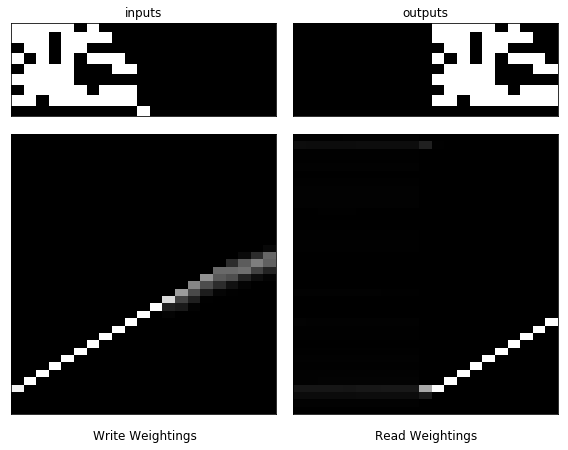

In [9]:
T = 10
test_data_loader = dataloader(num_batches = 1,batch_size = MINI_BATCH,seq_width=8,min_len=T,max_len=T)

for batch_num, X, Y in test_data_loader :
    result = evaluate_single_batch(model,loss_function, X, Y)
    visualize_read_write(X,result,model.N)